In [22]:

from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createDataFrame (dir):
    imagePaths = []
    labels = []
    for label in os.listdir(dir):
        # Skip hidden files
        if not label.startswith('.'):
            for imageName in os.listdir(os.path.join(dir, label)):
                imagePaths.append(os.path.join(dir, label, imageName))
                labels.append(label)
            print('Finished loading images from {}'.format(label))
    return imagePaths, labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createDataFrame(TRAIN_DIR)

Finished loading images from happy
Finished loading images from sad
Finished loading images from fear
Finished loading images from surprise
Finished loading images from neutral
Finished loading images from angry
Finished loading images from disgust


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = createDataFrame(TEST_DIR)

Finished loading images from happy
Finished loading images from sad
Finished loading images from fear
Finished loading images from surprise
Finished loading images from neutral
Finished loading images from angry
Finished loading images from disgust


In [6]:
def extractFeatures(images):
    print('Extracting features...')
    features = []
    for images in tqdm(images):
        img = load_img(images, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [7]:
trainFeatures = extractFeatures(train['image'])

Extracting features...


  0%|          | 0/28821 [00:00<?, ?it/s]

In [8]:
testFeatures = extractFeatures(test['image'])

Extracting features...


  0%|          | 0/7066 [00:00<?, ?it/s]

In [9]:
X_train = trainFeatures/255.0
X_test = testFeatures/255.0

In [10]:
LabelEncoder().fit(train['label'])

LabelEncoder()

In [11]:
Y_train = LabelEncoder().fit_transform(train['label'])
Y_test = LabelEncoder().fit_transform(test['label'])

In [12]:
Y_train = to_categorical(Y_train, num_classes=7)
Y_test = to_categorical(Y_test, num_classes=7)

In [13]:
model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/Users/adistrim/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 289s 641ms/step - accuracy: 0.4317 - loss: 1.5784 - val_accuracy: 0.4973 - val_loss: 1.3127
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 291s 645ms/step - accuracy: 0.4561 - loss: 1.4035 - val_accuracy: 0.5115 - val_loss: 1.2829
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 272s 604ms/step - accuracy: 0.4734 - loss: 1.3710 - val_accuracy: 0.5243 - val_loss: 1.2428
Epoch 4/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 293s 649ms/step - accuracy: 0.4817 - loss: 1.3426 - val_accuracy: 0.5286 - val_loss: 1.2400
Epoch 5/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 301s 666ms/step - accuracy: 0.4962 - loss: 1.3139 - val_accuracy: 0.5350 - val_loss: 1.2234
Epoch 6/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 317s 703ms/step - accuracy: 0.5002 - loss: 1.2918 - val_accuracy: 0.5478 - val_loss: 1.1896
Epoch 7/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 355s 788ms/step - accuracy: 0.5088 - loss: 1.2973 - val_accuracy: 0.5491 - val_loss: 1.1958
Epoch 8/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 303s 671ms/step - accuracy: 

In [24]:
# saving model as .keras file
model.save("models/emotionCheck.h5")

In [25]:
loaded_model = load_model("models/emotionCheck.h5")

In [26]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [27]:
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [28]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)

# Using the loaded model for prediction
pred = loaded_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
model prediction is sad


original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
model prediction is  angry


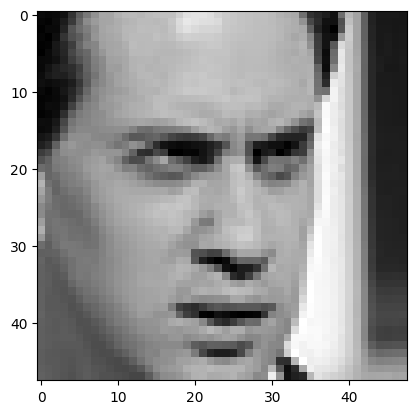

In [29]:
image = 'images/test/angry/966.jpg'
print("original image is of angry")
img = ef(image)
pred = loaded_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [30]:
model.save("models/emotionCheck.keras")